
# Árboles de decisión
---

**Los árboles de decisión** son un método de aprendizaje supervisado no paramétrico utilizado para la clasificación y la regresión, es un modelo que no es sensible a los NA ni a valores atipicos.

los árboles de decisión aprenden de los datos para aproximar curva con un conjunto de reglas de decisión if/else, ver ejemplo acontinuación. 

<center>
<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_tree_regression_001.png" width = 600>
</center>

Un arbol de decisión posee los siguientes elementos: 

* nodo raiz
* ramas
* nodos de decisión
* nodo hojas

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/f/f3/CART_tree_titanic_survivors.png" width = 400>
</center>



# Árboles de Clasificación 
---
<h2 align="center">Data set Iris</h2>
<center>
<img src="http://suruchifialoke.com/img/ML/iris.png" width="600">

In [0]:
# Cargando librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [0]:
# leyendo la base de datos del repositorio de unalytics
data = pd.read_csv("https://raw.githubusercontent.com/unalyticsteam/databases/master/iris.csv")

In [29]:
data.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


### Preparando los datos. 
---
Lo primero es identificar las variables que me serviran de predictores y cual la varible objetivo.


In [0]:
# tomando los nombres de las variables en una lista
colnames = data.columns.values.tolist()

In [0]:
# identificando predictores y variable de respuesta
predictors = colnames[:4]
target = colnames[4]

Tomemos una muestra aleatoria del aproximadamente el 75 % de las observaciones como datos de entrenamiento y el restante 25 % como datos de prueba. 

In [0]:
# creando una columna para identificar cuales observaciones nos serviran como datos de prueba. 
data["is_train"] = np.random.uniform(low=0, high=1, size= len(data)) <= 0.75

In [37]:
data.head(5)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,is_train
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,True
2,4.7,3.2,1.3,0.2,setosa,True
3,4.6,3.1,1.5,0.2,setosa,False
4,5.0,3.6,1.4,0.2,setosa,True


In [0]:
# tomando los datos de entrenamiento y los datos de prueba
train, test = data[data["is_train"] == True] , data[data["is_train"]== False]  

In [40]:
# observemos las primeras entradas
train.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,is_train
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,True
2,4.7,3.2,1.3,0.2,setosa,True


In [0]:
# Importando librerias 
# sklearn: biblioteca para aprendizaje de máquina de software libre (Incluye varios algoritmos de clasificación, regresión y análisis de grupos)
from sklearn.tree import DecisionTreeClassifier

In [42]:
# creando el árbol. 
tree = DecisionTreeClassifier(criterion="entropy", min_samples_split=20, random_state= 99)
tree.fit(train[predictors], train[target])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=99, splitter='best')

### Predicción

In [0]:
# predicciones
preds = tree.predict(test[predictors])


In [45]:
# Matriz de confusión. 
pd.crosstab(test[target], preds, rownames=["acutual"], colnames=["predictors"])

predictors,setosa,versicolor,virginica
acutual,,,
setosa,12,0,0
versicolor,0,12,0
virginica,0,3,9


### Vusualización

In [46]:
# Instalacion en colab. 
! pip install graphviz

In [0]:
# importando libreria de visualización. 
from sklearn.tree import export_graphviz

In [0]:
# hay que exportar como .dot (grafos)
with open("dtree.dot", "w") as dotfile:
    export_graphviz(tree, out_file=dotfile, feature_names=predictors)
    dotfile.close()

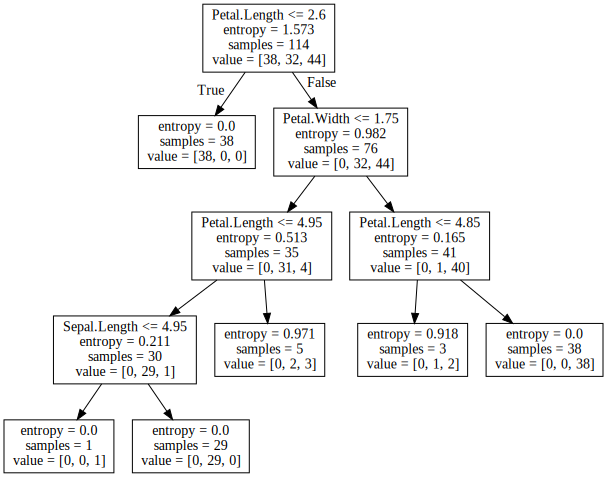

In [50]:
# leyendo el objeto.
from graphviz import Source
file = open("dtree.dot", "r")
text = file.read()
Source(text)

### Validación cruzada. 
---

In [0]:
X = data[predictors]
Y = data[target]

In [62]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth= 5,
                              min_samples_split=20, random_state=99)
tree.fit(X, Y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=99, splitter='best')

In [0]:
from sklearn.model_selection import KFold

In [68]:
cv = KFold(X.shape[0], shuffle=True, random_state=1 )

sklearn.model_selection._split.KFold

In [0]:
from sklearn.model_selection import  cross_val_score

In [77]:
scores = cross_val_score(tree, X, Y, scoring="accuracy", cv = cv, n_jobs=1)
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [78]:
score = np.mean(scores)
score

0.9466666666666667

# Árboles de Regresión
---

In [0]:
# Impotando librerias
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

**Leyendo los datos de las casas de Boston(1978), del repositorio de unalytics**



In [0]:
data = pd.read_csv("https://raw.githubusercontent.com/unalyticsteam/databases/master/Boston.csv")

**crim:** indice de criminologia per-capita.(100 induviduos)

**zn:** proporcion de zona de residencia por cada pie cudrado

**indus:** Acceso a zona de industria.

**chas:** cerca rio de boston (0, 1)

**rm:** promedio de habitaciones. 

...

### Rápido Análisis
---

In [0]:
# Observemos las 3 primeras filas
data.head(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


observemos las variables, tipo de dato, memoria.

In [0]:
# dimensión de la base de datos.
data.shape

(506, 14)

In [0]:
# informacion de la base de datos.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


### Pre-Procesando base de datos.
---

In [0]:
colnames = data.columns.values.tolist()
colnames

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'black',
 'lstat',
 'medv']

In [0]:
# preprocesado 
predictors = colnames[0:13]
targets = colnames[13]
x = data[predictors]
y = data[targets]

In [0]:
regtree = DecisionTreeRegressor(min_samples_split=30, min_samples_leaf=10, random_state=0)

In [0]:
regtree.fit(x,y) #predictoras, prediccion

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=30, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [0]:
preds = regtree.predict(data[predictors])

In [0]:
data["preds"] = preds

In [0]:
data[["preds", "medv"]].head()

,preds,medv
0,22.840000,24.0
1,22.840000,21.6
2,35.247826,34.7
3,35.247826,33.4
4,35.247826,36.2


### Visualizacion

In [0]:
from sklearn.tree import export_graphviz

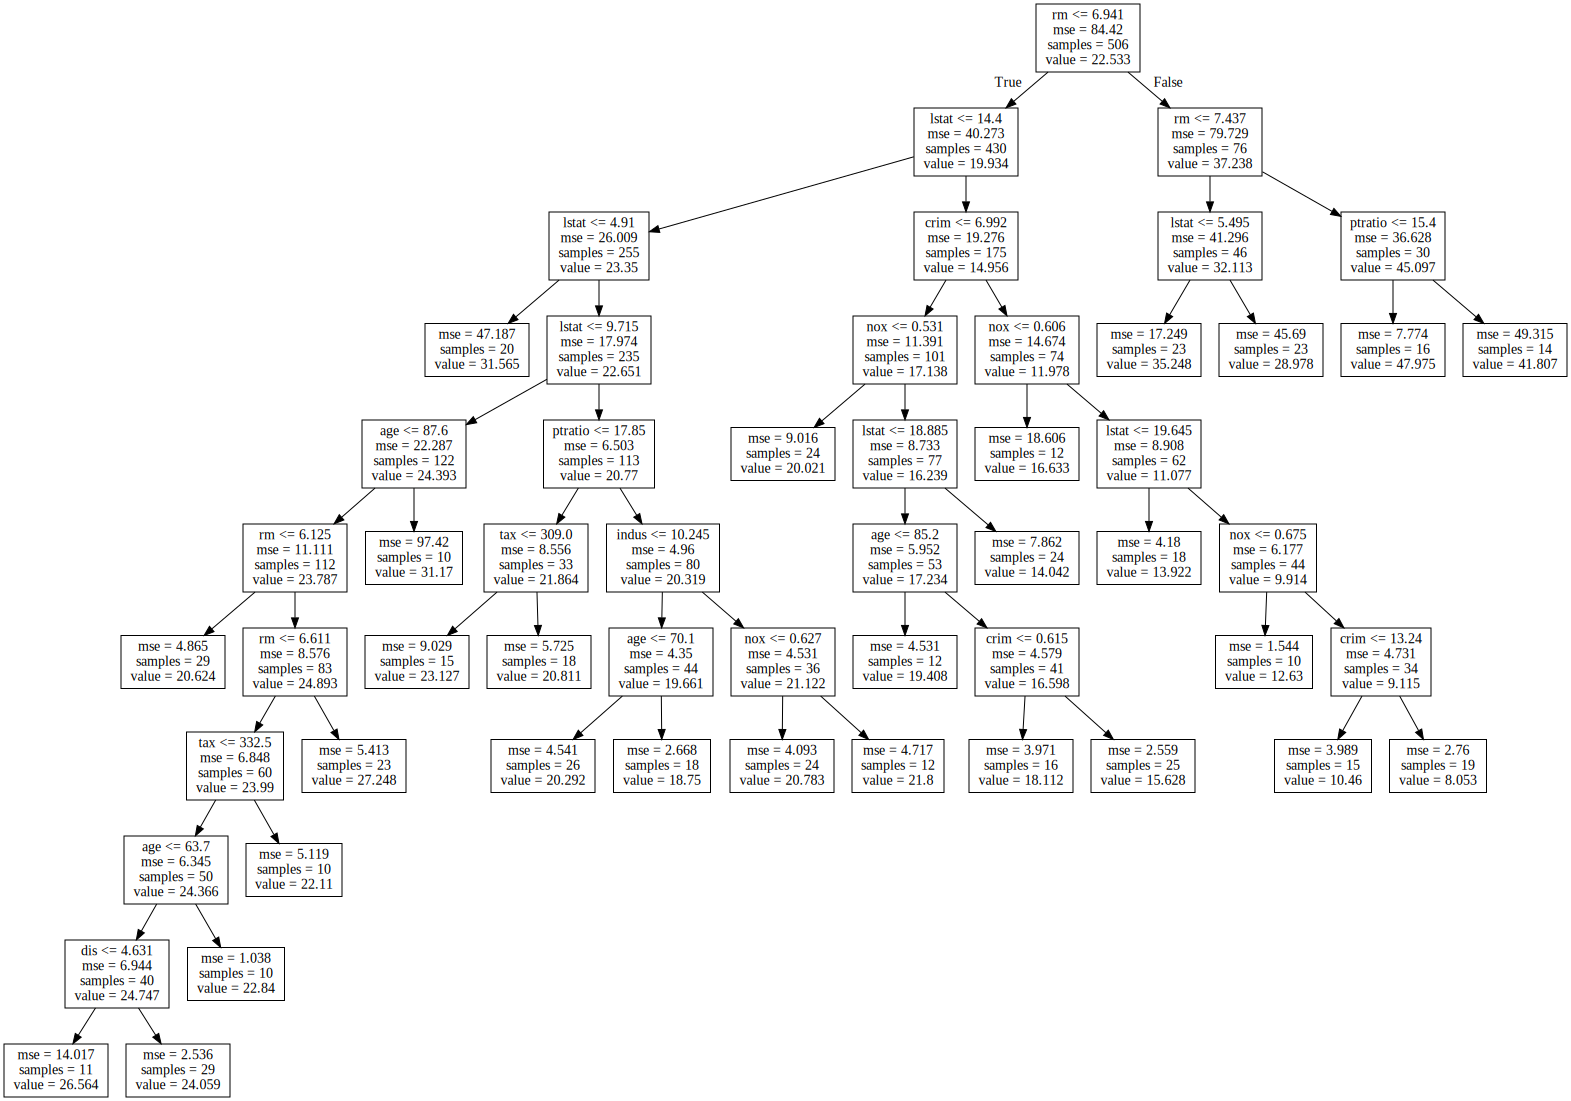

In [0]:
from sklearn.tree import export_graphviz
with open("boston_rtree.dot", "w") as dotfile:
    export_graphviz(regtree, out_file=dotfile, feature_names=predictors)
    dotfile.close()
    
import os
from graphviz import Source
file = open("boston_rtree.dot", "r")
text = file.read()
Source(text)
